In [3]:
import numpy as np
import pandas as pd
import nbimporter
import dynamicalModels as dynamicalModels
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.tsatools import detrend
import statsmodels
import matplotlib.pyplot as plt


Importing Jupyter notebook from dynamicalModels.ipynb


# Van der Pool Oscillator

In [4]:
x0 = np.array([5.0, 5.0])
dt = 0.1
tinit = 0
tmax = 100
vdp = dynamicalModels.van_der_pol(2)

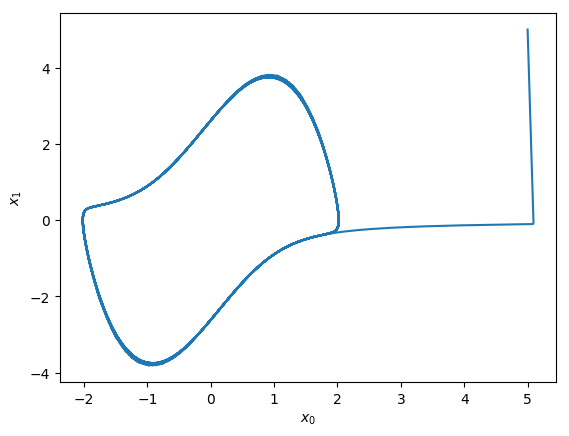

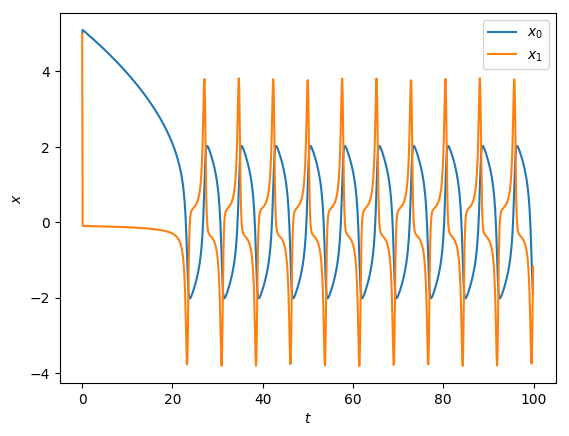

In [5]:
sol = vdp.integrate(tinit,tmax,dt,x0)
data_length =(sol.t).shape
vdp.trajectory_plot()
vdp.evolution_plot()

In [6]:
vdp_df = pd.DataFrame(data=(sol.y).T,    
                columns=['x','dx'])

#detrend 
vdp_df = vdp_df.diff()
vdp_df = vdp_df.dropna()

model = VAR(vdp_df)

#find optimal lag order by information criteria
lag_orders_data = model.select_order(trend='nc')
print(lag_orders_data.selected_orders)

{'aic': 21, 'bic': 12, 'hqic': 17, 'fpe': 21}


/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [5]:
#fit to optimal AIC lag number
results = model.fit(lag_orders_data.selected_orders['bic'],trend='nc')
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 24, May, 2019
Time:                     22:24:01
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -25.5628
Nobs:                     987.000    HQIC:                  -25.7103
Log likelihood:           9979.72    FPE:                6.23522e-12
AIC:                     -25.8008    Det(Omega_mle):     5.94270e-12
--------------------------------------------------------------------
Results for equation x
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
L1.x          -2.521889         0.222465          -11.336           0.000
L1.dx          0.340541         0.008022           42.453           0.000
L2.x           2.107268         0.260031            8.104           0.000
L2.dx          0.0

In [6]:
# Wald Test
causal_results = results.test_causality('x', 'dx', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('dx', 'x', kind='Wald')
print(causal_results.summary())

# F Test
causal_results = results.test_causality('x', 'dx', kind='F')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('dx', 'x', kind='F')
print(causal_results.summary())

Granger causality Wald-test. H_0: dx does not Granger-cause x. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
  1.672e+04        21.03       0.000  12
----------------------------------------
		
Granger causality Wald-test. H_0: x does not Granger-cause dx. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    1700.          21.03       0.000  12
----------------------------------------
Granger causality F-test. H_0: dx does not Granger-cause x. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df    
------------------------------------------------
    1393.          1.757       0.000  (12, 1926)
------------------------------------------------
		
Granger causality F-test. H_0: x does not Granger-cause dx. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical valu

# Wiener Process

In [7]:
def a_fun(X):
    return 0
def b_fun(X):
    return 5

#create four independently sample Weiner Process
sodes= dynamicalModels.sdes(a_fun,b_fun)
y = np.zeros([3,4000])
for i in range(3): 
    x0 = 10*(2*np.random.uniform(size=1)-1)
    out = sodes.euler_maruyama(0.01,x0,20.0,4000)
    y[i,:] = out[1]
t = out[0]


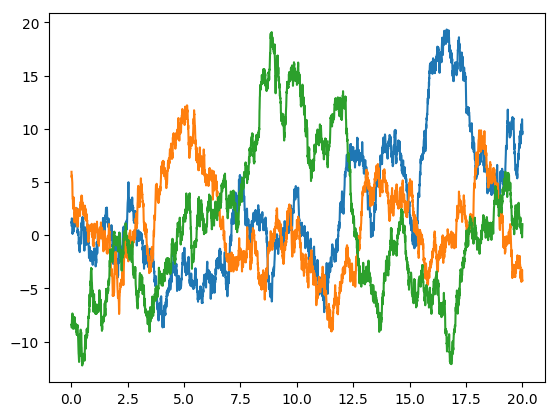

In [8]:
plt.plot(t,y.T)
plt.show()

In [9]:
wiener_df = pd.DataFrame(data=y.T,    
                columns=['x0','x1','x2'])

#detrend
wiener_df = wiener_df.diff()
wiener_df = wiener_df.dropna()
model = VAR(wiener_df)


#find optimal lag order by information criteria
lag_orders_data = model.select_order(trend='nc')
print(lag_orders_data.selected_orders)

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


{'aic': 1, 'bic': 1, 'hqic': 1, 'fpe': 1}


In [10]:
#fit to optimal AIC lag number
results = model.fit(lag_orders_data.selected_orders['bic'],trend='nc')
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 24, May, 2019
Time:                     22:24:02
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -6.24051
Nobs:                     3998.00    HQIC:                  -6.24965
Log likelihood:          -4506.65    FPE:                 0.00192145
AIC:                     -6.25467    Det(Omega_mle):      0.00191713
--------------------------------------------------------------------
Results for equation x0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
L1.x0        -0.007368         0.015820           -0.466           0.641
L1.x1         0.006866         0.016075            0.427           0.669
L1.x2        -0.000866         0.015907           -0.054           0.957

Results for equation 

In [11]:
# Wald Test
causal_results = results.test_causality('x0', 'x1', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x2', kind='Wald')
print(causal_results.summary())

Granger causality Wald-test. H_0: x1 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    0.1824         3.841       0.669  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
   0.002962        3.841       0.957  1 
----------------------------------------


In [12]:
# Wald Test
causal_results = results.test_causality('x1', 'x0', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x2', kind='Wald')
print(causal_results.summary())

Granger causality Wald-test. H_0: x0 does not Granger-cause x1. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    3.724          3.841       0.054  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
   0.002962        3.841       0.957  1 
----------------------------------------


In [13]:
# Wald Test
causal_results = results.test_causality('x2', 'x0', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x2', 'x1', kind='Wald')
print(causal_results.summary())

Granger causality Wald-test. H_0: x0 does not Granger-cause x2. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    0.2226         3.841       0.637  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x1 does not Granger-cause x2. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    0.6957         3.841       0.404  1 
----------------------------------------


# Simple Enzymatic Reaction

I'm getting strange errors when going regression on the deterministic or stochastic gillespie. This maybe due to the niether being purely stochastic.

In [14]:
S = np.array([[-1, 1, 0, 0, 0, 0],
              [ 0, 0, 0, 0, 1, -1],
              [ 1,-1,-1, 1, 0, 0],
              [ 0, 0, 1,-1,-1, 1],
              [-1, 1, 0, 0, 1,-1]])

reaction_rates =np.array([1.0,1.0,2.0,1.0,1.0,2.0])
tinit = 0.0
tmax = 100.0
dt = 0.01

x0 = np.array([1.0,1.0,1.0,1.0,1.0])

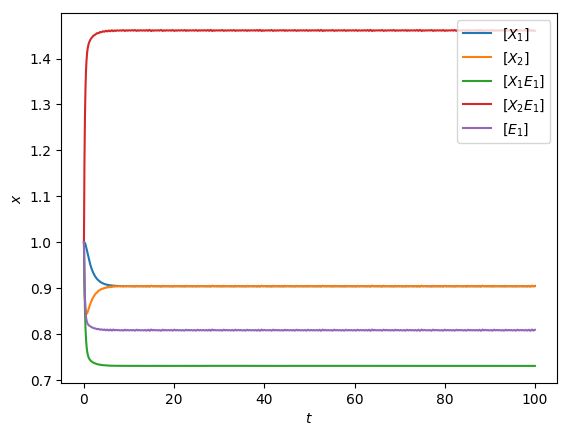

In [15]:
chemical_obj= dynamicalModels.enzymatic_reaction(S,reaction_rates)
sol = chemical_obj.integrate(tinit,tmax,dt,x0)
chemical_obj.evolution_plot()

In [16]:
chemical_system_df = pd.DataFrame(data= (sol.y).T,  
                columns=['X1','X2','X1E1','X2E1','E1'])

chemical_system_df=chemical_system_df.diff()
chemical_system_df = chemical_system_df.dropna()
model = VAR(chemical_system_df)

lag_orders_data = model.select_order(trend='nc')
print(lag_orders_data.selected_orders)

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


{'aic': 2, 'bic': 2, 'hqic': 2, 'fpe': 2}


In [17]:
#regression fails with lag greater than 1
results = model.fit(lag_orders_data.selected_orders['bic'],trend='nc')
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 24, May, 2019
Time:                     22:24:09
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -193.438
Nobs:                     9997.00    HQIC:                  -193.462
Log likelihood:           896204.    FPE:                9.44744e-85
AIC:                     -193.474    Det(Omega_mle):     9.40033e-85
--------------------------------------------------------------------
Results for equation X1
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
L1.X1      8174866.614444       277.703155        29437.428           0.000
L1.X2      8174863.773452       277.701453        29437.598           0.000
L1.X1E1   28503442.160758        66.841695       426432.069           0.000
L1.X2E1

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:1387: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params))
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [18]:
# Wald Test
causal_results = results.test_causality('X1', 'X2', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('X1', 'X1E1', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('X1', 'X2E1', kind='Wald')

print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('X1', 'E1', kind='Wald')
print(causal_results.summary())

Granger causality Wald-test. H_0: X2 does not Granger-cause X1. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
  8.605e+10        5.991       0.000  2 
----------------------------------------
		
Granger causality Wald-test. H_0: X1E1 does not Granger-cause X1. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
  -1.558e+11       5.991       1.000  2 
----------------------------------------
		
Granger causality Wald-test. H_0: X2E1 does not Granger-cause X1. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
  -1.558e+11       5.991       1.000  2 
----------------------------------------
		
Granger causality Wald-test. H_0: E1 does not Granger-cause X1. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical val

# Kuramuto Models: Strong Coupling

In [19]:
# these are our constants
N = 3  # number of variables
K = 10 #coupling
omega =  np.array([3.07139979, 0.07936669, 2.63766864])   # natural frequency
theta0 = np.array([1.46606489, 1.66029349, 0.17308032]) # initial state 
tinit = 0.0
tmax = 30.0
dt =  0.01

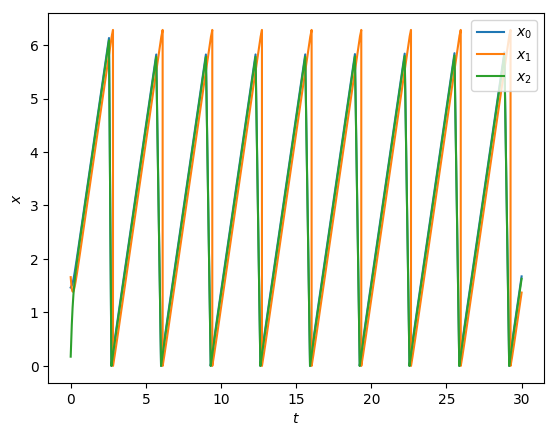

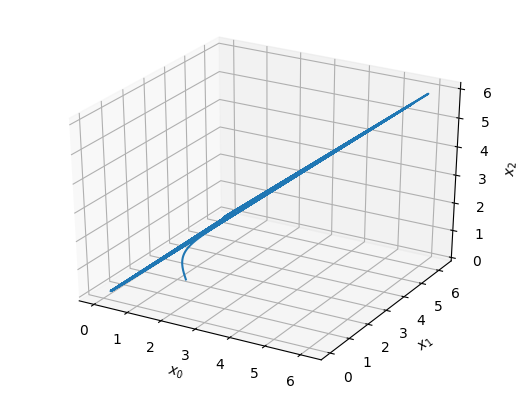

In [20]:
kuramoto = dynamicalModels.Kuramoto(N,K,omega)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
kuramoto.evolution_plot()
kuramoto.trajectory_plot()

#down sample data 

y = sol[1].T
total_len =y.shape[1]
idx = np.round(np.linspace(0, total_len-1,1000)).astype(int)
y = y[:,idx]

In [21]:
kuramoto_df = pd.DataFrame(data=y.T,    
                columns=['x0','x1','x2'])

kuramoto_df = kuramoto_df.diff()
kuramoto_df = kuramoto_df.dropna()
model = VAR(kuramoto_df)

#find optimal lag order by information criteria
lag_orders_data = model.select_order(trend='nc')
print(lag_orders_data.selected_orders)

{'aic': 4, 'bic': 2, 'hqic': 3, 'fpe': 4}


/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [22]:
#fit to optimal BIC lag number -- AIC can recommend high number of terms which more likely can lead to failure to reject
results = model.fit(lag_orders_data.selected_orders['bic'],trend='nc')
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 24, May, 2019
Time:                     22:24:17
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -17.8090
Nobs:                     997.000    HQIC:                  -17.8639
Log likelihood:           4695.88    FPE:                1.68732e-08
AIC:                     -17.8975    Det(Omega_mle):     1.65722e-08
--------------------------------------------------------------------
Results for equation x0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
L1.x0        30.257110         4.268917            7.088           0.000
L1.x1        -0.028551         0.008798           -3.245           0.001
L1.x2       -31.076889         4.343888           -7.154           0.000
L2.x0       -27.216513

In [23]:
# Wald Test
causal_results = results.test_causality('x0', 'x1', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x2', kind='Wald')
print(causal_results.summary())

# F Test
causal_results = results.test_causality('x0', 'x1', kind='F')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x2', kind='F')
print(causal_results.summary())

Granger causality Wald-test. H_0: x1 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    22.06          5.991       0.000  2 
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    54.53          5.991       0.000  2 
----------------------------------------
Granger causality F-test. H_0: x1 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    11.03          2.999       0.000  (2, 2973)
-----------------------------------------------
		
Granger causality F-test. H_0: x2 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical valu

In [24]:
# Wald Test
causal_results = results.test_causality('x1', 'x0', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x1', 'x2', kind='Wald')
print(causal_results.summary())

# F Test
causal_results = results.test_causality('x1', 'x0', kind='F')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x1', 'x2', kind='F')
print(causal_results.summary())

Granger causality Wald-test. H_0: x0 does not Granger-cause x1. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    26.11          5.991       0.000  2 
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x1. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    27.79          5.991       0.000  2 
----------------------------------------
Granger causality F-test. H_0: x0 does not Granger-cause x1. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    13.06          2.999       0.000  (2, 2973)
-----------------------------------------------
		
Granger causality F-test. H_0: x2 does not Granger-cause x1. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical valu

In [25]:
# Wald Test
causal_results = results.test_causality('x2', 'x0', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x2', 'x1', kind='Wald')
print(causal_results.summary())

# F Test
causal_results = results.test_causality('x2', 'x0', kind='F')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x2', 'x1', kind='F')
print(causal_results.summary())

Granger causality Wald-test. H_0: x0 does not Granger-cause x2. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    48.52          5.991       0.000  2 
----------------------------------------
		
Granger causality Wald-test. H_0: x1 does not Granger-cause x2. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    22.24          5.991       0.000  2 
----------------------------------------
Granger causality F-test. H_0: x0 does not Granger-cause x2. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    24.26          2.999       0.000  (2, 2973)
-----------------------------------------------
		
Granger causality F-test. H_0: x1 does not Granger-cause x2. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical valu

# Kuramuto Models: Medium Coupling

In [26]:
# these are our constants
N = 3  # number of variables
K = 5 #coupling
omega =  np.array([0.67708389, 1.17506036, 1.69101935])   # natural frequency
theta0 = np.array([2.59507806, 1.67388715, 0.98643206]) # initial state 
tinit = 0.0
tmax = 40.0
dt =  0.1

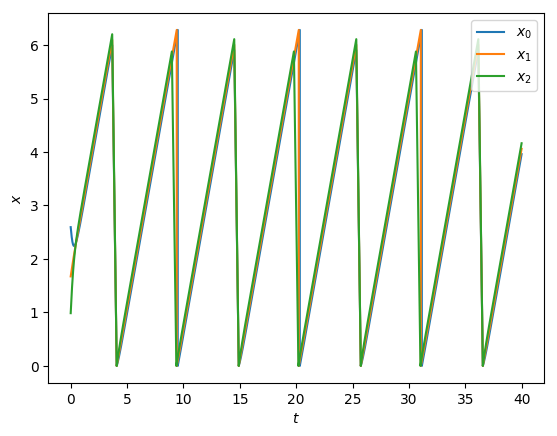

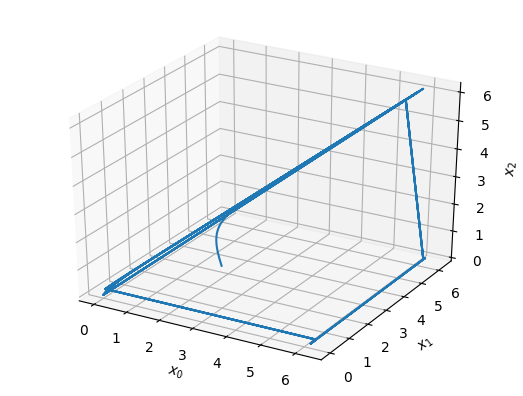

In [27]:
kuramoto = dynamicalModels.Kuramoto(N,K,omega)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
kuramoto.evolution_plot()
kuramoto.trajectory_plot()

#down sample data 

y = sol[1].T
total_len =y.shape[1]
idx = np.round(np.linspace(0, total_len-1,1000)).astype(int)
y = y[:,idx]

In [28]:
kuramoto_df = pd.DataFrame(data=y.T,    
                columns=['x0','x1','x2'])
#detrend
kuramoto_df = kuramoto_df.diff()
kuramoto_df = kuramoto_df.dropna()

model = VAR(kuramoto_df)

#find optimal lag order by information criteria
lag_orders_data = model.select_order(trend='nc')
print(lag_orders_data.selected_orders)

{'aic': 1, 'bic': 1, 'hqic': 1, 'fpe': 1}


/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [29]:
#fit to optimal BIC lag number -- AIC can recommend high number of terms which more likely can lead to failure to reject
results = model.fit(lag_orders_data.selected_orders['bic'],trend='nc')
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 24, May, 2019
Time:                     22:24:23
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -6.23777
Nobs:                     998.000    HQIC:                  -6.26520
Log likelihood:          -1104.58    FPE:                 0.00186963
AIC:                     -6.28201    Det(Omega_mle):      0.00185287
--------------------------------------------------------------------
Results for equation x0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
L1.x0         0.031649         0.034525            0.917           0.359
L1.x1         0.029789         0.034348            0.867           0.386
L1.x2         0.147601         0.059090            2.498           0.012

Results for equation 

In [30]:
# Wald Test
causal_results = results.test_causality('x0', 'x1', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x2', kind='Wald')
print(causal_results.summary())

# F Test
causal_results = results.test_causality('x0', 'x1', kind='F')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x2', kind='F')
print(causal_results.summary())

Granger causality Wald-test. H_0: x1 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    0.7521         3.841       0.386  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    6.240          3.841       0.012  1 
----------------------------------------
Granger causality F-test. H_0: x1 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    0.7521         3.845       0.386  (1, 2985)
-----------------------------------------------
		
Granger causality F-test. H_0: x2 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statist

In [31]:
# Wald Test
causal_results = results.test_causality('x1', 'x0', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x1', 'x2', kind='Wald')
print(causal_results.summary())

# F Test
causal_results = results.test_causality('x1', 'x0', kind='F')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x1', 'x2', kind='F')
print(causal_results.summary())

Granger causality Wald-test. H_0: x0 does not Granger-cause x1. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    0.8165         3.841       0.366  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x1. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    6.143          3.841       0.013  1 
----------------------------------------
Granger causality F-test. H_0: x0 does not Granger-cause x1. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    0.8165         3.845       0.366  (1, 2985)
-----------------------------------------------
		
Granger causality F-test. H_0: x2 does not Granger-cause x1. Conclusion: reject H_0 at 5% significance level.
Test statist

In [32]:
# Wald Test
causal_results = results.test_causality('x2', 'x0', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x2', 'x1', kind='Wald')
print(causal_results.summary())

# F Test
causal_results = results.test_causality('x2', 'x0', kind='F')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x2', 'x1', kind='F')
print(causal_results.summary())

Granger causality Wald-test. H_0: x0 does not Granger-cause x2. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    4.047          3.841       0.044  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x1 does not Granger-cause x2. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    3.563          3.841       0.059  1 
----------------------------------------
Granger causality F-test. H_0: x0 does not Granger-cause x2. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    4.047          3.845       0.044  (1, 2985)
-----------------------------------------------
		
Granger causality F-test. H_0: x1 does not Granger-cause x2. Conclusion: fail to reject H_0 at 5% significance level.
Test statist

# Kuramoto: Weak Coupling

In [33]:
# these are our constants
N = 3  # number of variables
K = 0.01 #coupling
omega =  np.array([2.29123113, 2.18648215, 0.42314841])   # natural frequency
theta0 = np.array([0.66576799, 2.46651174, 1.98040486])  # initial state 
tinit = 0.0
tmax = 40.0
dt =  0.1

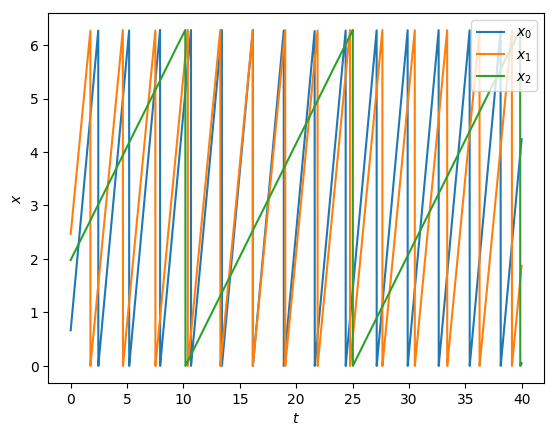

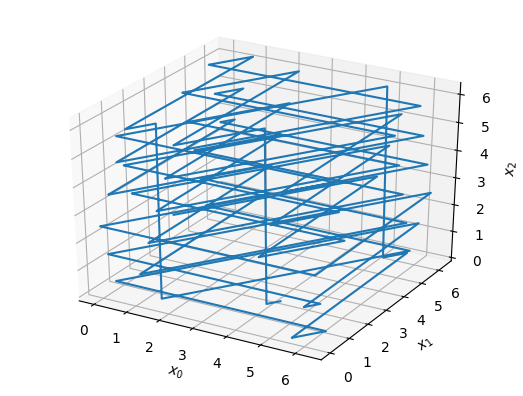

In [34]:
kuramoto = dynamicalModels.Kuramoto(N,K,omega)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
kuramoto.evolution_plot()
kuramoto.trajectory_plot()

#down sample data 

y = sol[1].T
total_len =y.shape[1]
idx = np.round(np.linspace(0, total_len-1,1000)).astype(int)
y = y[:,idx]

In [35]:
kuramoto_df = pd.DataFrame(data=y.T,    
                columns=['x0','x1','x2'])

#detrend
kuramoto_df = kuramoto_df.diff()
kuramoto_df = kuramoto_df.dropna()

model = VAR(kuramoto_df)

#find optimal lag order by information criteria
lag_orders_data = model.select_order(trend='nc')
print(lag_orders_data.selected_orders)

{'aic': 1, 'bic': 1, 'hqic': 1, 'fpe': 1}


/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [36]:
#fit to optimal AIC lag number -- AIC and BIC are the same
results = model.fit(lag_orders_data.selected_orders['bic'],trend='nc')
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 24, May, 2019
Time:                     22:24:26
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -3.25786
Nobs:                     998.000    HQIC:                  -3.28528
Log likelihood:          -2591.55    FPE:                  0.0368058
AIC:                     -3.30210    Det(Omega_mle):       0.0364758
--------------------------------------------------------------------
Results for equation x0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
L1.x0        -0.004696         0.031632           -0.148           0.882
L1.x1         0.066420         0.031756            2.092           0.036
L1.x2        -0.001597         0.068589           -0.023           0.981

Results for equation 

In [37]:
# Wald Test
causal_results = results.test_causality('x0', 'x1', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x2', kind='Wald')
print(causal_results.summary())

# F Test
causal_results = results.test_causality('x0', 'x1', kind='F')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x2', kind='F')
print(causal_results.summary())

Granger causality Wald-test. H_0: x1 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    4.375          3.841       0.036  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
  0.0005421        3.841       0.981  1 
----------------------------------------
Granger causality F-test. H_0: x1 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    4.375          3.845       0.037  (1, 2985)
-----------------------------------------------
		
Granger causality F-test. H_0: x2 does not Granger-cause x0. Conclusion: fail to reject H_0 at 5% significance level.
Test statist

In [38]:
# Wald Test
causal_results = results.test_causality('x1', 'x0', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x1', 'x2', kind='Wald')
print(causal_results.summary())

# F Test
causal_results = results.test_causality('x1', 'x0', kind='F')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x1', 'x2', kind='F')
print(causal_results.summary())

Granger causality Wald-test. H_0: x0 does not Granger-cause x1. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
   0.004560        3.841       0.946  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x1. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
  1.587e-05        3.841       0.997  1 
----------------------------------------
Granger causality F-test. H_0: x0 does not Granger-cause x1. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
   0.004560        3.845       0.946  (1, 2985)
-----------------------------------------------
		
Granger causality F-test. H_0: x2 does not Granger-cause x1. Conclusion: fail to reject H_0 at 5% significance lev

In [39]:
# Wald Test
causal_results = results.test_causality('x2', 'x0', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x2', 'x1', kind='Wald')
print(causal_results.summary())

# F Test
causal_results = results.test_causality('x2', 'x0', kind='F')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x2', 'x1', kind='F')
print(causal_results.summary())

Granger causality Wald-test. H_0: x0 does not Granger-cause x2. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
   0.02830         3.841       0.866  1 
----------------------------------------
		
Granger causality Wald-test. H_0: x1 does not Granger-cause x2. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
   0.02865         3.841       0.866  1 
----------------------------------------
Granger causality F-test. H_0: x0 does not Granger-cause x2. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
   0.02830         3.845       0.866  (1, 2985)
-----------------------------------------------
		
Granger causality F-test. H_0: x1 does not Granger-cause x2. Conclusion: fail to reject H_0 at 5% significance lev

# Lorenz 96

In [40]:
# these are our constants
N = 5  # number of variables
F = 8  # forcing
x0 = F*np.ones(N) # initial state (equilibrium)
x0[2] += 0.01 # add small perturbation to 20th variable
tinit = 0
tmax = 10.0
dt = 0.01

In [41]:
lorenz96 = dynamicalModels.Lorenz96(N,F)
sol = lorenz96.integrate(tinit,tmax, dt ,x0)

In [42]:
lorenz96_df = pd.DataFrame(data=(sol.y).T,    
                columns=['x0','x1','x2','x3','x4'])

#detrend
lorenz96_df = lorenz96_df.diff()
lorenz96_df = lorenz96_df.dropna()

model = VAR(lorenz96_df)

#find optimal lag order by information criteria
lag_orders_data = model.select_order(trend='nc')
print(lag_orders_data.selected_orders)

{'aic': 21, 'bic': 20, 'hqic': 21, 'fpe': 21}


/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [43]:
#fit to optimal BIC
results = model.fit(lag_orders_data.selected_orders['bic'],trend='nc')
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 24, May, 2019
Time:                     22:24:26
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -70.4773
Nobs:                     979.000    HQIC:                  -72.0235
Log likelihood:           29274.6    FPE:                2.04077e-32
AIC:                     -72.9730    Det(Omega_mle):     1.25487e-32
--------------------------------------------------------------------
Results for equation x0
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
L1.x0          2.971034         0.036243           81.975           0.000
L1.x1         -0.041177         0.041403           -0.995           0.320
L1.x2          0.045202         0.053149            0.850           0.395
L1.x3         -0.

In [44]:
# Wald Test
causal_results = results.test_causality('x0', 'x1', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x2', kind='Wald')
print(causal_results.summary())

causal_results = results.test_causality('x0', 'x3', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x0', 'x4', kind='Wald')
print(causal_results.summary())


Granger causality Wald-test. H_0: x1 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    406.8          31.41       0.000  20
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    141.3          31.41       0.000  20
----------------------------------------
Granger causality Wald-test. H_0: x3 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    185.1          31.41       0.000  20
----------------------------------------
		
Granger causality Wald-test. H_0: x4 does not Granger-cause x0. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
---------

In [45]:
# Wald Test
causal_results = results.test_causality('x1', 'x0', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x1', 'x2', kind='Wald')
print(causal_results.summary())

causal_results = results.test_causality('x1', 'x3', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x1', 'x4', kind='Wald')
print(causal_results.summary())

Granger causality Wald-test. H_0: x0 does not Granger-cause x1. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    329.5          31.41       0.000  20
----------------------------------------
		
Granger causality Wald-test. H_0: x2 does not Granger-cause x1. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    67.30          31.41       0.000  20
----------------------------------------
Granger causality Wald-test. H_0: x3 does not Granger-cause x1. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    151.6          31.41       0.000  20
----------------------------------------
		
Granger causality Wald-test. H_0: x4 does not Granger-cause x1. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
---------

In [46]:
# Wald Test
causal_results = results.test_causality('x2', 'x0', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x2', 'x1', kind='Wald')
print(causal_results.summary())

causal_results = results.test_causality('x2', 'x3', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x2', 'x4', kind='Wald')
print(causal_results.summary())

Granger causality Wald-test. H_0: x0 does not Granger-cause x2. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    252.2          31.41       0.000  20
----------------------------------------
		
Granger causality Wald-test. H_0: x1 does not Granger-cause x2. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    106.1          31.41       0.000  20
----------------------------------------
Granger causality Wald-test. H_0: x3 does not Granger-cause x2. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    390.0          31.41       0.000  20
----------------------------------------
		
Granger causality Wald-test. H_0: x4 does not Granger-cause x2. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
---------

In [47]:
# Wald Test
causal_results = results.test_causality('x3', 'x1', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x3', 'x1', kind='Wald')
print(causal_results.summary())

causal_results = results.test_causality('x3', 'x2', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x3', 'x4', kind='Wald')
print(causal_results.summary())

Granger causality Wald-test. H_0: x1 does not Granger-cause x3. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    100.2          31.41       0.000  20
----------------------------------------
		
Granger causality Wald-test. H_0: x1 does not Granger-cause x3. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    100.2          31.41       0.000  20
----------------------------------------
Granger causality Wald-test. H_0: x2 does not Granger-cause x3. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    69.11          31.41       0.000  20
----------------------------------------
		
Granger causality Wald-test. H_0: x4 does not Granger-cause x3. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
---------

In [48]:
# Wald Test
causal_results = results.test_causality('x4', 'x1', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x4', 'x1', kind='Wald')
print(causal_results.summary())

causal_results = results.test_causality('x4', 'x2', kind='Wald')
print(causal_results.summary())

print('\t\t')

causal_results = results.test_causality('x4', 'x3', kind='Wald')
print(causal_results.summary())

Granger causality Wald-test. H_0: x1 does not Granger-cause x4. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    296.6          31.41       0.000  20
----------------------------------------
		
Granger causality Wald-test. H_0: x1 does not Granger-cause x4. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    296.6          31.41       0.000  20
----------------------------------------
Granger causality Wald-test. H_0: x2 does not Granger-cause x4. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
    90.52          31.41       0.000  20
----------------------------------------
		
Granger causality Wald-test. H_0: x3 does not Granger-cause x4. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
---------